In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena.bmp')
#用 pyplot 使 Img 顯示在 jupyter notebook 中
def imshow(img):
    plt.imshow(img[:,:,::-1])#因為 plt 與 cv 一個是 RGB 另一個是 BGR
imshow(img)

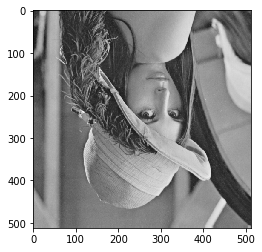

In [2]:
img2 = img.copy()
for i in range(len(img[0])):
    for j in range(len(img)):
        img2[len(img)-i-1][j] = img[i][j]
imshow(img2)

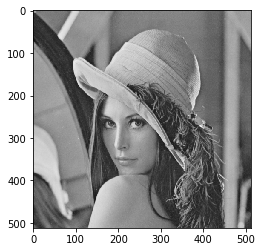

In [3]:
img3 = img.copy()
for i in range(len(img[0])):
    for j in range(len(img)):
        img3[i][len(img)-j-1] = img[i][j]
imshow(img3)

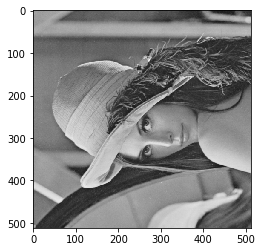

In [12]:
img4 = img.copy()

for i in range(512):
    for j in range(i+1,512):
        img4[i][j],img4[j][i] = img[j][i],img[i][j]
imshow(img4)

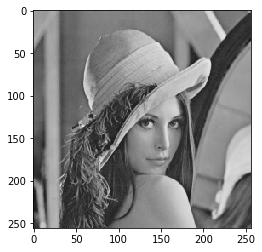

In [5]:
#產生空白image
img5 = np.zeros((256,256,3), np.uint8)
img5.fill(255)
for i in range(0, 512, 2):
    for j in range(0, 512, 2):
        img5[i//2][j//2] = img[i][j]//4 + img[i][j+1]//4 + img[i+1][j]//4 + img[i+1][j+1]//4
imshow(img5)

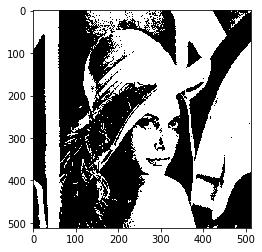

In [14]:
img6 = img.copy()
for i in img6:
    for j in i:
        if j[0] < 128:
            j *= 0
        else:
            j[0] = j[1] = j[2] = 255 
imshow(img6)

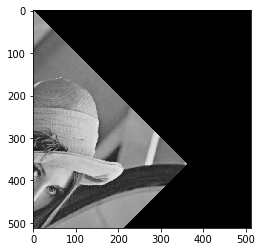

In [7]:
def rotation(a, b, degree):
    v = np.array((a,b))
    theta = np.radians(degree)
    r = np.array(( (np.cos(theta), -np.sin(theta)),(np.sin(theta),  np.cos(theta))))
    v = r.dot(v)
    v = (int(round(v[0])), int(round(v[1])))
    return v
img7 = np.zeros((512,512,3), np.uint8)
for i in range(512):
    for j in range(512):
        ori = rotation(i,j,45)
        if ori[0] >= 512 or ori[1]>=512 or ori[0]<0 or ori[1]<0:
            img7[i][j] = 0
        else:
            img7[i][j] = img[ori[0]][ori[1]]
imshow(img7)

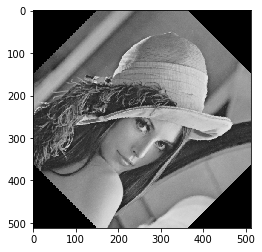

In [8]:
img8 = img.copy()
def rotation_b(img, degree):
    newimg = np.zeros((len(img),len(img[0]),3), np.uint8)
    cent_x = len(newimg[0])/2
    cent_y = len(newimg)/2
    theta = np.radians(degree)
    r = np.array(( (np.cos(theta), -np.sin(theta)),(np.sin(theta),  np.cos(theta))))
    for i in range(len(img)):
        for j in range(len(img[0])):
            v = np.array((i - cent_y, j - cent_x))
            v = r.dot(v)
            v = (int(round(v[0]+cent_y)), int(round(v[1]+cent_x)))
            if v[0] > len(img)-1 or v[1]>len(img)-1 or v[0]<0 or v[1]<0:
                pass
            else:
                newimg[i][j] = img[v[0]][v[1]]
    return newimg
imshow(rotation_b(img8, 45))